# Similar Words + Knowledge Graph

## Summary of Notebook
- This code imports necessary libraries for natural language processing, graph creation and visualization.
- The Google pre-trained Word2Vec model is downloaded and loaded using the gensim library.
- The Hamlet dataset is loaded from the gutenberg corpus in the NLTK library.
- A function find_keywords is defined which takes an input word and returns the top keywords related to it based on cosine similarity scores between the input word and words in the Hamlet dataset.
- A directed graph is created using the networkx library and the input word is added as a root node.
- The top keywords returned from the find_keywords function are added as nodes to the graph with edge weights equal to their cosine similarity with the input word.
- The graph is visualized using matplotlib.
- The create_knowledge_graph function is called with an input word to create a graph of the top keywords related to it.
- The output graph shows the input word as the root node with edges connecting to the top related keywords as nodes.

# Imports

In [3]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package gutenberg to /usr/share/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Get Google's Word2Vec Model

In [11]:

# Download and load Google's pre-trained Word2Vec model
w2v_model = api.load('word2vec-google-news-300')

# Get Dataset

In [10]:
# Load Hamlet dataset
dataset = gutenberg.raw('shakespeare-hamlet.txt')


In [ ]:
# dataset

# Function that Embedds the text and then finds cosine similarity between Input Text and Dataset words

In [27]:

def find_keywords(input_word, num_keywords=10):
    # Tokenize input word
    input_tokens = [word.lower() for word in word_tokenize(input_word) if word.isalpha()]
    # Find word2vec for input word
    input_vec = w2v_model[input_tokens[0]] if input_tokens[0] in w2v_model else None
    # Tokenize text
    tokens = [word.lower() for word in word_tokenize(dataset) if word.isalpha()]
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Find word2vec for all words in hamlet
    token_vecs = [w2v_model[word] for word in tokens if word in w2v_model]
    # Calculate cosine similarity between input word vector and all token vectors
    if token_vecs:
        similarities = cosine_similarity([input_vec], token_vecs)[0]
        # Sort similarities in descending order and return top 5 keywords
        keyword_scores = sorted(zip(tokens, similarities), key=lambda x: x[1], reverse=True)[:num_keywords]
    else:
        keyword_scores = []
    # Return top 10 keywords and their scores
    return keyword_scores
# Example usage
input_word = 'hamlet'
keywords = find_keywords(input_word)
# print(keywords)

# Create Knowledge Graph of the Similar Words (Nodes = Words & Weights = Cosine similarity) 

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def create_knowledge_graph(input_word, keywords):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add input word as root node
    G.add_node(input_word)
    
    # Add keywords as nodes with edge weights equal to cosine similarity
    for keyword, cosine_sim in keywords:
        if cosine_sim > 0:
            G.add_node(keyword)
            G.add_edge(input_word, keyword, weight=cosine_sim)
      
  # Draw graph
    pos = nx.spring_layout(G, k=0.3)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()


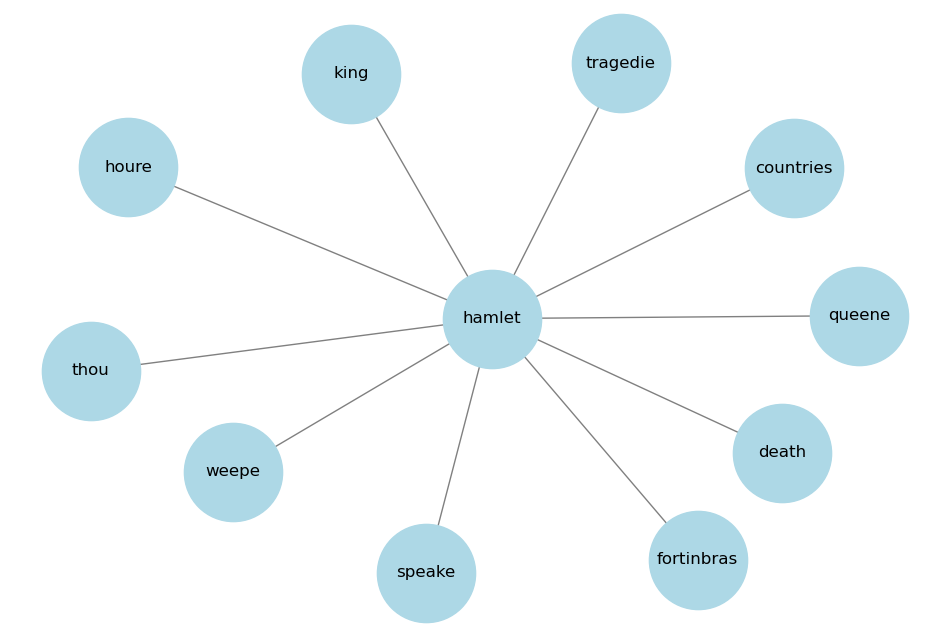

In [29]:
create_knowledge_graph(input_word,keywords)